In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_curve, 
    precision_recall_curve, 
    confusion_matrix, 
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    PrecisionRecallDisplay
)


In [2]:
# Load your train/test split (if you saved it):
X_train, X_test, y_train, y_test = joblib.load("../models/split_data.pkl")

# choosing random forest (highest ROC)
rf = joblib.load("../models/random_forest.pkl")

In [3]:
# Extract and sort
feat_imp = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_imp = feat_imp.sort_values(ascending=False)

# Display top 10
feat_imp.head(10)


thal_7.0    0.170839
cp_4.0      0.129928
ca          0.119900
thalach     0.117159
oldpeak     0.096500
age         0.063023
chol        0.059902
trestbps    0.053854
exang       0.048776
sex         0.040381
dtype: float64

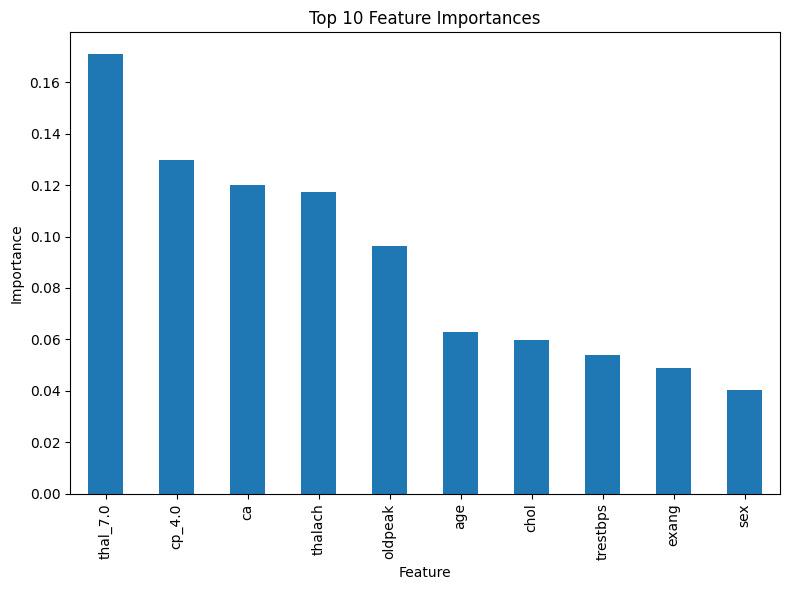

In [4]:
plt.figure(figsize=(8,6))
feat_imp.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()


c:\Users\LENOVO\OneDrive\Desktop\Personal Projects\heart-disease-prediction\venv\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


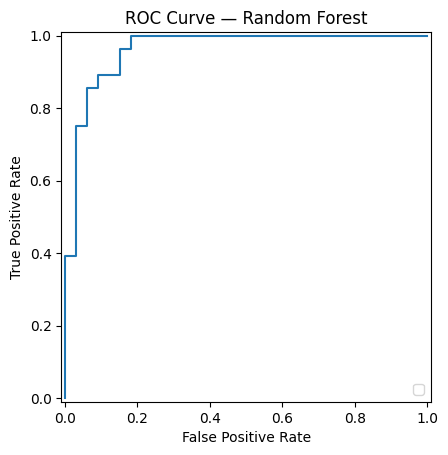

In [5]:
y_proba = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)

RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title("ROC Curve — Random Forest")
plt.show()


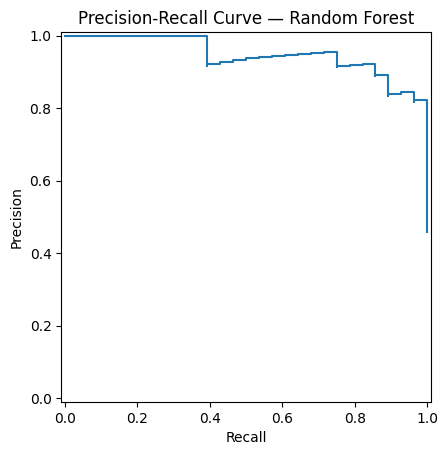

In [6]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)

PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title("Precision‑Recall Curve — Random Forest")
plt.show()


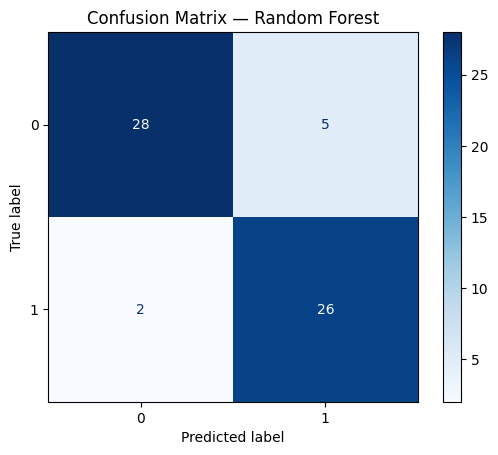

In [7]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm, display_labels=rf.classes_).plot(cmap='Blues')
plt.title("Confusion Matrix — Random Forest")
plt.show()
